<h3 style=color:lightblue >Week 7: Introduction to Machine Learning (ML)</h3>

 Topics Covered:
Data preprocessing

Splitting data into train/test

Training a Linear Regression model

Evaluating performance using metrics

In [1]:
# Week 7 – Introduction to Machine Learning (Regression Example)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
np.random.seed(42)


In [2]:
# Simulate a dataset for house prices
n = 200
area = np.random.normal(1500, 300, n)  # in sqft
bedrooms = np.random.randint(2, 5, n)
age = np.random.randint(1, 30, n)
price = (area * 100) + (bedrooms * 50000) - (age * 1000) + np.random.normal(0, 20000, n)

# Create DataFrame
df = pd.DataFrame({
    "area_sqft": area,
    "bedrooms": bedrooms,
    "age_years": age,
    "price": price
})

df.head()


,area_sqft,bedrooms,age_years,price
0,1649.014246,3,17,312740.684921
1,1458.520710,3,17,308385.243473
2,1694.306561,2,20,263435.515210
3,1956.908957,2,16,277044.906813
4,1429.753988,2,25,216503.176442


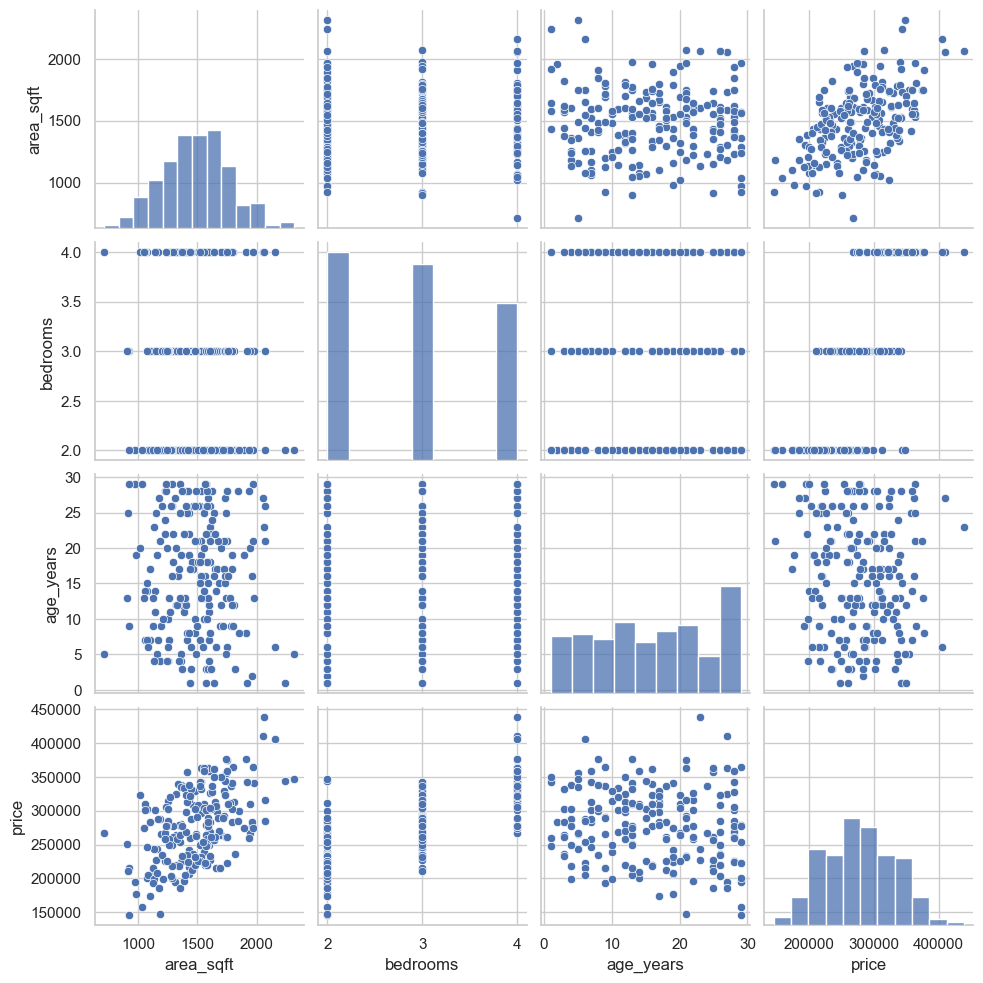

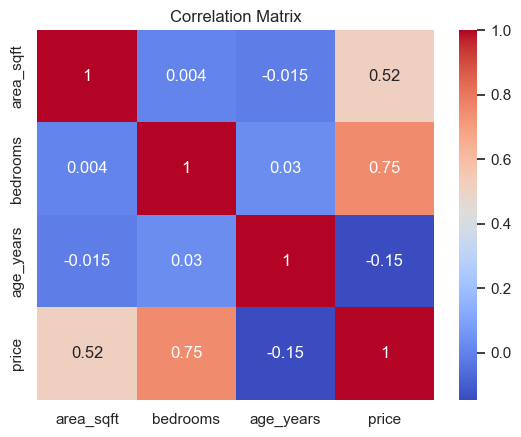

In [3]:
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Features and target
X = df[["area_sqft", "bedrooms", "age_years"]]
y = df["price"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -700.6120493736234
Coefficients: [  100.27985929 50843.90220768 -1138.01151075]


In [9]:
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 382245334.20
R-squared: 0.86


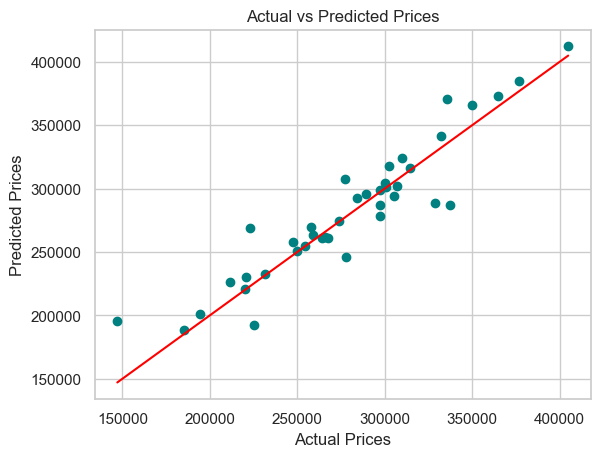

In [10]:
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()
